# Import Libs

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Install and import wordcloud
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , accuracy_score, recall_score, f1_score

import os
# You can donwnload the data set form this link : https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb
# Specify the relative path to your dataset directory
dataset_directory = 'Genere Classification Dataset'

# Walk through the directory and list all files
for dirname, _, filenames in os.walk(dataset_directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")


# Importing Data


In [2]:
df = pd.read_csv('Genre Classification Dataset\\train_data.txt', sep='\t', on_bad_lines='skip')


In [3]:
df.head()

,"1 ::: Oscar et la dame rose (2009) ::: drama ::: Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue."
0,2 ::: Cupid (1997) ::: thriller ::: A brother ...
1,"3 ::: Young, Wild and Wonderful (1980) ::: adu..."
2,4 ::: The Secret Sin (1915) ::: drama ::: To h...
3,5 ::: The Unrecovered (2007) ::: drama ::: The...
4,6 ::: Quality Control (2011) ::: documentary :...


In [5]:
train_data = pd.read_csv('Genre Classification Dataset\\train_data.txt', sep=":::", names=["Title", "Genre", "Description"], engine="python")

In [6]:
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
train_data.shape

(54214, 3)

In [8]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [9]:
train_data.duplicated().sum()

0

In [10]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [11]:
test_data = pd.read_csv('Genre Classification Dataset/test_data.txt', sep=":::", names=["Id" ,"Title", "Description"], engine="python")

In [12]:
test_data.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [13]:
test_data.shape

(54200, 3)

In [14]:
test_data.duplicated().sum()

0

In [15]:
test_data.isnull().sum()

Id             0
Title          0
Description    0
dtype: int64

# Visualisation of our data

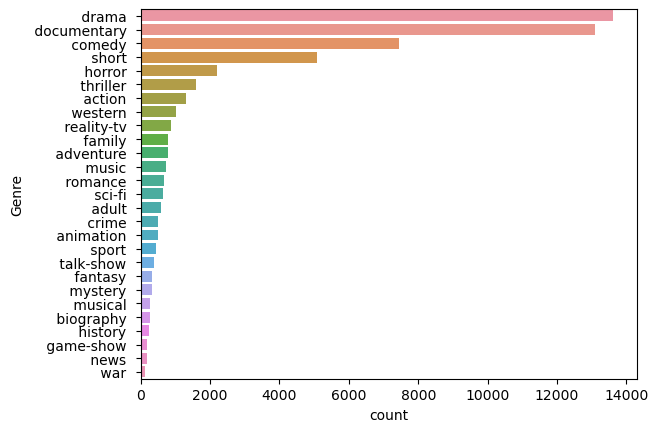

In [16]:
plt.figure()
sns.countplot(data=train_data, y="Genre", order= train_data["Genre"].value_counts().index)
plt.show()

In [17]:
train_data['Genre']

1               drama 
2            thriller 
3               adult 
4               drama 
5               drama 
             ...      
54210          comedy 
54211          horror 
54212     documentary 
54213          comedy 
54214         history 
Name: Genre, Length: 54214, dtype: object

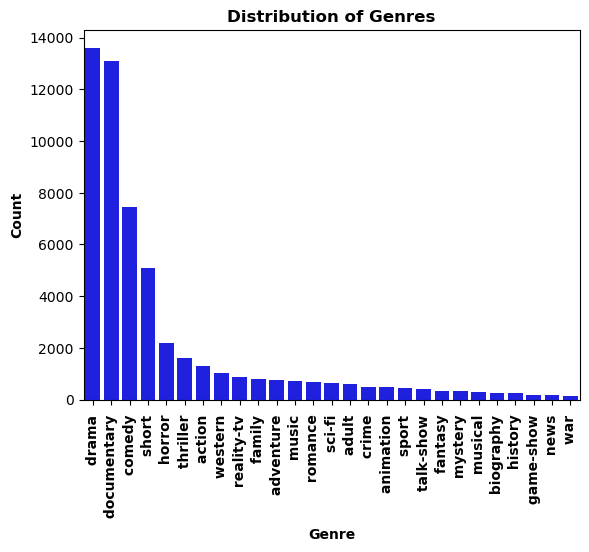

In [18]:
plt.figure()
counts = train_data.Genre.value_counts()
sns.barplot(x=counts.index, y=counts, color='blue')
plt.xlabel('Genre' , fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Distribution of Genres',  fontweight='bold')
plt.xticks(rotation=90, fontweight='bold');

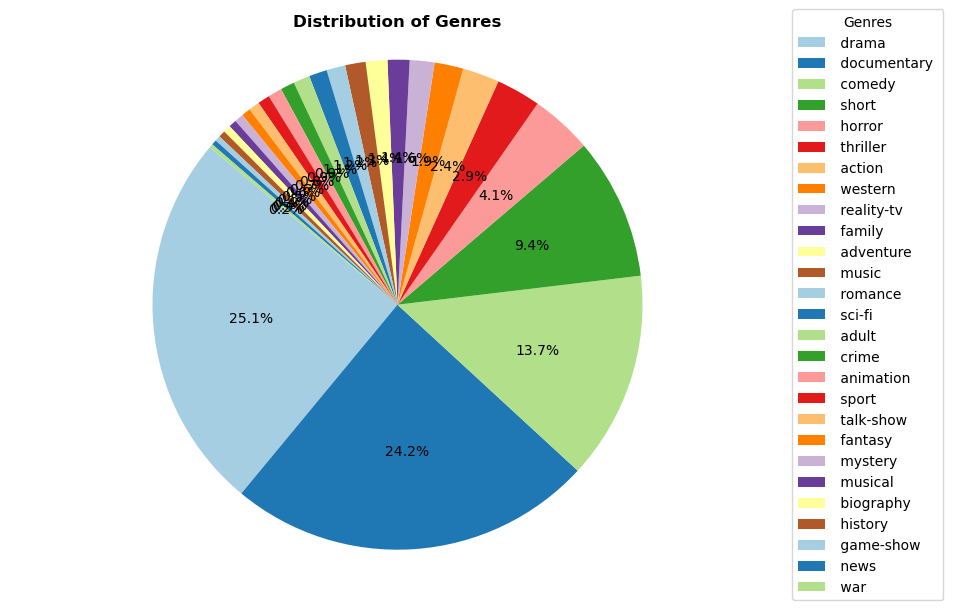

In [19]:
counts = train_data.Genre.value_counts()


plt.figure(figsize=(10, 7))
wedges, texts, autotexts = plt.pie(counts, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)


plt.legend(wedges, counts.index, title="Genres", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


plt.title('Distribution of Genres', fontweight='bold')
plt.axis('equal')


plt.show()

In [20]:
train_data['length']=train_data['Description'].apply(len)
train_data.head()

,Title,Genre,Description,length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


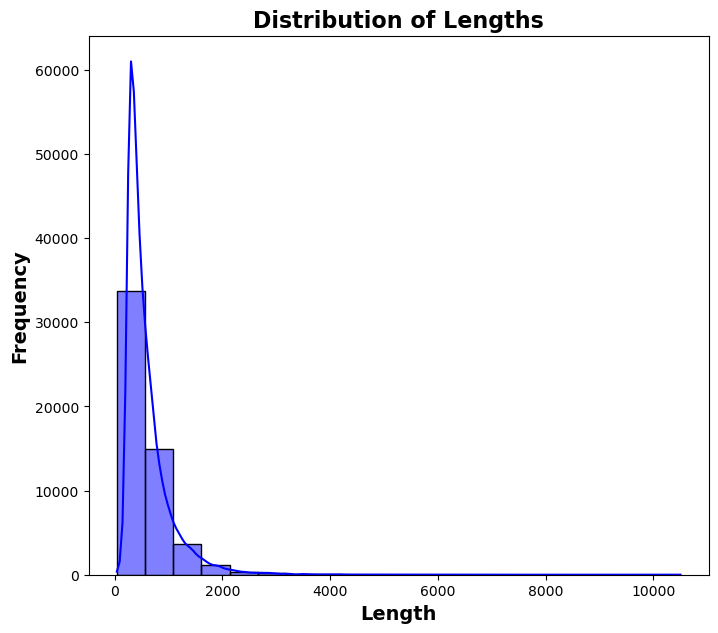

In [21]:
plt.figure(figsize=(8, 7))

sns.histplot(data=train_data, x='length', bins=20, kde=True, color='blue')

plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')

plt.show()

# Data preprocessing

In [22]:
import nltk

In [23]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)  # Change to replace non-characters with a space
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    # Use the predefined stop_words variable instead of redefining it inside the function
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    return text

train_data["TextCleaning"] = train_data["Description"].apply(data_processing)
test_data["TextCleaning"] = test_data["Description"].apply(data_processing)

In [24]:
train_data

,Title,Genre,Description,length,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,film title refers recovered bodies ground zero...
...,...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,507,short lived nbc live sitcom centered bonino wo...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,781,next generation exploitation sisters kapa bay ...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",255,bestaan echt stand comedy growing facing fears...
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,642,walter vivian live country difficult time keep...


In [25]:
train_data.head()

,Title,Genre,Description,length,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,film title refers recovered bodies ground zero...


In [26]:
train_data.head(1)

,Title,Genre,Description,length,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,listening conversation doctor parents year old...


In [27]:
train_data.iloc[0]['Description']

' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'

In [28]:
train_data.iloc[0]['TextCleaning']

'listening conversation doctor parents year old oscar learns nobody courage tell weeks live furious refuses speak anyone except straight talking rose lady pink meets hospital stairs christmas approaches rose uses fantastical experiences professional wrestler imagination wit charm allow oscar live life love full company friends pop corn einstein bacon childhood sweetheart peggy blue'

In [29]:
vector = TfidfVectorizer()

x_train = vector.fit_transform(train_data["TextCleaning"])
x_test = vector.transform(test_data["TextCleaning"])

In [30]:
x = x_train
y = train_data["Genre"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [31]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (43371, 116601)
Size of y_train:  (43371,)
Size of x_test:  (10843, 116601)
Size of y_test:  (10843,)


# Train the Model

In [33]:
m1 = LogisticRegression()
m2 = MultinomialNB()

# we are using these 2 models for checking which one performs well

In [34]:
columns=['LogisticRegression' , 'MultinomialNB']
result = []

In [35]:
m1.fit(x_train,y_train)
y_pred_1 = m1.predict(x_test)
accuracy1 = accuracy_score(y_pred_1,y_test)
result.append(accuracy1)
print(m1)
print(accuracy1)

LogisticRegression()
0.5774232223554366


In [36]:
m2.fit(x_train,y_train)
y_pred_2 = m2.predict(x_test)
accuracy2 = accuracy_score(y_pred_2,y_test)
result.append(accuracy2)
print(m2)
print(accuracy2)

MultinomialNB()
0.4460942543576501


In [37]:
report_m1 = classification_report(y_test , y_pred_1)
print(report_m1)

               precision    recall  f1-score   support

      action        0.56      0.21      0.30       263
       adult        0.82      0.21      0.33       112
   adventure        0.48      0.12      0.19       139
   animation        0.75      0.03      0.06       104
   biography        0.00      0.00      0.00        61
      comedy        0.52      0.59      0.55      1443
       crime        0.50      0.01      0.02       107
 documentary        0.65      0.86      0.74      2659
       drama        0.53      0.80      0.64      2697
      family        0.53      0.05      0.10       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.93      0.33      0.48        40
     history        0.00      0.00      0.00        45
      horror        0.68      0.55      0.61       431
       music        0.70      0.37      0.48       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

In [38]:
report_m2 = classification_report(y_test , y_pred_2)
print(report_m2)

               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.62      0.04      0.08      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

In [ ]:
# we can tell that logistic regression worked well for this data set for predection of movie genere..